In [1]:
# Importing the libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout


import os 
import zipfile

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#downloading the data
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /cats_and_dogs_filtered.zip

--2022-02-07 05:36:21--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.15.128, 173.194.76.128, 142.251.5.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.15.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/cats_and_dogs_filtered.zip’

/cats_and_dogs_filt 100%[===================>]  65.43M  32.0MB/s    in 2.0s    

2022-02-07 05:36:24 (32.0 MB/s) - ‘/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
# Unzipping the data
dataset_path = "/cats_and_dogs_filtered.zip"

zip_object = zipfile.ZipFile(file =dataset_path, mode="r")

zip_object.extractall("./")
zip_object.close()

In [4]:
#Creating directory
dataset_path_new = "/content/cats_and_dogs_filtered"

train_dir = os.path.join(dataset_path_new, "train")

valid_dir = os.path.join(dataset_path_new, "validation")

In [5]:
# Instantiating the Image data generator
data_gen_train = ImageDataGenerator(rescale=1/255)

data_gen_valid = ImageDataGenerator(rescale=1/255)

In [6]:
#Scaling the data
train_gen = data_gen_train.flow_from_directory(train_dir, target_size=(128,128),
                                               batch_size = 128, class_mode = "binary")

valid_gen = data_gen_train.flow_from_directory(valid_dir, target_size=(128,128),
                                               batch_size = 128, class_mode = "binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
# Building the body of the model Using VGG19
base_model = tf.keras.applications.VGG19(input_shape=(128,128,3), weights="imagenet", include_top=False)

#freaaxing the layer
for layer in base_model.layers:
  layer.trainable= False

80150528/80134624 [==============================] - 2s 0us/step


In [9]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [8]:
#Creating the Head of the model
model = Flatten()(base_model.output)

model = Dense(units=1024, activation="relu")(model)
model = Dense(units=512, activation="relu")(model)

prediction_layer = Dense(units=2, activation="softmax")(model)

In [10]:
# Joining the head and body
model = Model(inputs= base_model.input, outputs = prediction_layer)

In [11]:
#Summarising the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [12]:
# Compiling and training 
model.compile(optimizer='adam', loss = "sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

model.fit_generator(train_gen, epochs=6, validation_data=valid_gen)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/6
16/16 [==============================] - 51s 2s/step - loss: 1.1036 - sparse_categorical_accuracy: 0.6680 - val_loss: 0.3809 - val_sparse_categorical_accuracy: 0.8200
Epoch 2/6
16/16 [==============================] - 11s 714ms/step - loss: 0.3515 - sparse_categorical_accuracy: 0.8495 - val_loss: 0.3309 - val_sparse_categorical_accuracy: 0.8650
Epoch 3/6
16/16 [==============================] - 12s 773ms/step - loss: 0.2472 - sparse_categorical_accuracy: 0.8965 - val_loss: 0.3220 - val_sparse_categorical_accuracy: 0.8690
Epoch 4/6
16/16 [==============================] - 11s 710ms/step - loss: 0.1844 - sparse_categorical_accuracy: 0.9250 - val_loss: 0.3543 - val_sparse_categorical_accuracy: 0.8590
Epoch 5/6
16/16 [==============================] - 13s 824ms/step - loss: 0.1783 - sparse_categorical_accuracy: 0.9265 - val_loss: 0.3470 - val_sparse_categorical_accuracy: 0.8650
Epoch 6/6
16/16 [==============================] - 11s 710ms/step - loss: 0.1326 - sparse_categorical_a

Text(0.5, 1.0, 'Training-Validation Accuracy')

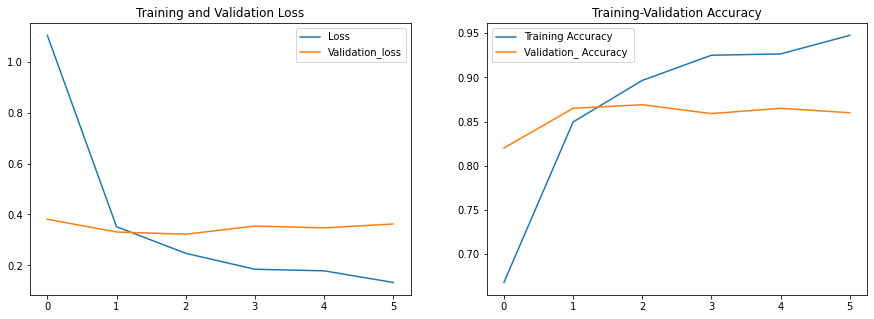

In [13]:
#saving the losses
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(1,2,2)
plt.plot(loss['sparse_categorical_accuracy'],label = "Training Accuracy")
plt.plot(loss['val_sparse_categorical_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

# Transfer learning Using Mobile Net architecture

In [14]:
# Building the body of the model Using VGG19
base_model = tf.keras.applications.MobileNet(input_shape=(128,128,3), weights="imagenet", include_top=False)

#freaaxing the layer
for layer in base_model.layers:
  layer.trainable= False

17235968/17225924 [==============================] - 1s 0us/step


In [15]:
base_model.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128       
 ation)                                         

In [16]:
#Creating the Head of the model
model = Flatten()(base_model.output)

model = Dense(units=1024, activation="relu")(model)
model = Dense(units=512, activation="relu")(model)

prediction_layer = Dense(units=2, activation="softmax")(model)

In [17]:
# Joining the head and body
model = Model(inputs= base_model.input, outputs = prediction_layer)

In [18]:
#Summarising the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128       
 ation)                                                    

In [19]:
# Compiling and training 
model.compile(optimizer='adam', loss = "sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

model.fit_generator(train_gen, epochs=6, validation_data=valid_gen)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/6
16/16 [==============================] - 13s 677ms/step - loss: 3.5447 - sparse_categorical_accuracy: 0.8335 - val_loss: 0.8529 - val_sparse_categorical_accuracy: 0.9410
Epoch 2/6
16/16 [==============================] - 9s 571ms/step - loss: 0.3701 - sparse_categorical_accuracy: 0.9650 - val_loss: 0.2504 - val_sparse_categorical_accuracy: 0.9670
Epoch 3/6
16/16 [==============================] - 9s 572ms/step - loss: 0.0482 - sparse_categorical_accuracy: 0.9910 - val_loss: 0.1792 - val_sparse_categorical_accuracy: 0.9690
Epoch 4/6
16/16 [==============================] - 9s 569ms/step - loss: 0.0017 - sparse_categorical_accuracy: 0.9995 - val_loss: 0.1461 - val_sparse_categorical_accuracy: 0.9740
Epoch 5/6
16/16 [==============================] - 9s 580ms/step - loss: 6.9697e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.1469 - val_sparse_categorical_accuracy: 0.9740
Epoch 6/6
16/16 [==============================] - 9s 582ms/step - loss: 1.7470e-04 - sparse_categor

Text(0.5, 1.0, 'Training-Validation Accuracy')

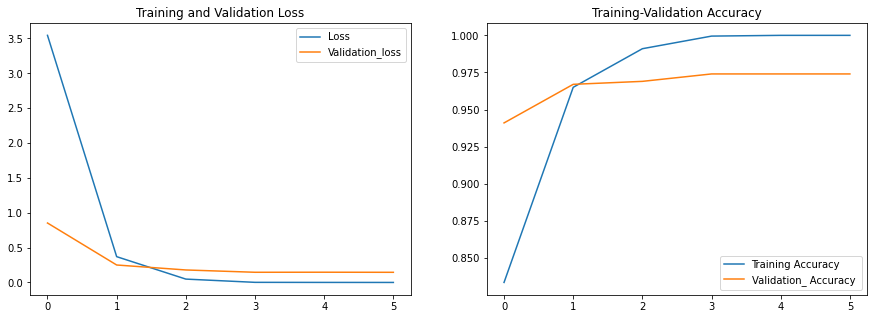

In [20]:
#saving the losses
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(1,2,2)
plt.plot(loss['sparse_categorical_accuracy'],label = "Training Accuracy")
plt.plot(loss['val_sparse_categorical_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")